In [1]:
import numpy as np
import datajoint as dj
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import axes
import scipy.signal as signal
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import scipy.io as sio
import scikits.bootstrap as bootstrap
import scipy
import scipy.signal as signal
import matplotlib
%matplotlib notebook
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['legend.frameon'] = False

In [2]:
dj.conn()
burst = dj.create_virtual_module('burst', 'fb_burst')

Please enter DataJoint username: 
Please enter DataJoint password: ········
Connecting @localhost:3306


# Figure 5A - example bursting traces

<IPython.core.display.Javascript object>


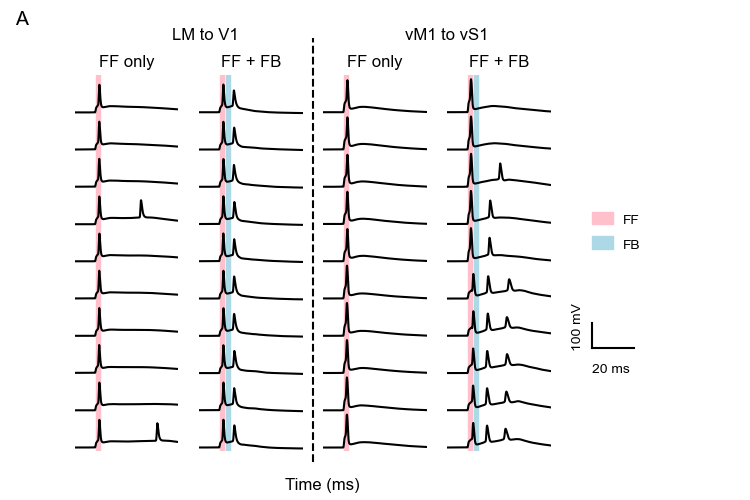

In [3]:
pos = dict(left=0.1, top=0.85, bottom=0.1, right=0.9)
fig, axs = plt.subplots(1, 5, figsize=[7.5, 5])

# left column for no light trials
trace_height = 0.15
trace_bases = np.arange(0, 10) * trace_height
xlim = [140, 190]
ylim = [trace_bases[0]-0.01, trace_bases[-1]+trace_height]
fsize_label = 14

q = burst.Protocol * burst.Protocol.Trace * burst.Protocol.Spikes
key = dict(
    area='V1',
    cell_idx=1,
)

current_onset = q.fetch('current_onset', limit=1)
time_diff = 3

titles = ['FF only', 'FF + FB'] * 2 + [''] 
for iax, ax in enumerate(axs):
    if iax in [0, 1]:
        key = dict(
            area='V1',
            cell_idx=1,
        )
        if iax == 0:
            diff = 'time_diff is NULL'
        else:
            diff = 'time_diff = 3'
        
    elif iax in [2, 3]:
        key = dict(
            area='S1',
            cell_idx=6
        )
        if iax == 2:
            diff = 'time_diff is NULL'
        else: 
            diff = 'time_diff = 3'
    
    if iax in [0, 1, 2, 3]:
        traces_rel = q & key & diff
        time, traces = traces_rel.fetch('time', 'trace')
        traces = traces[0:10]
        traces = [trace-trace[0]+trace_bases[itrace]  for itrace, trace in enumerate(traces)]

        if iax in [1, 3]:
            ax.fill_betweenx(
                ylim, 
                current_onset+time_diff,
                current_onset+time_diff+2, 
                color='lightblue')
        ax.fill_betweenx(
            ylim, 150, 152, color='pink')
        ax.plot(time[0], np.transpose(traces), color='black')
        
    else:
        
        x_bar = [150, 170]
        y_bar = [0.4, 0.5]
        
        ax.plot(x_bar, [y_bar[0]]*2, color='black')
        ax.plot([x_bar[0]]*2, y_bar, color='black')
        ax.text(x_bar[0], y_bar[0]-0.1, '20 ms')
        ax.text(x_bar[0]-10, y_bar[0], '100 mV', rotation=90)
        
        x_legend = [150, 160]
        y_legend_blue = [0.8, 0.85]
        y_legend_red = np.add(y_legend_blue, 0.1)
        
        ax.fill_betweenx(y_legend_blue, x_legend[0], x_legend[1], color='lightblue')
        ax.fill_betweenx(y_legend_red, x_legend[0], x_legend[1], color='pink')
        
        x_diff = 15
        ax.text(x_legend[0] + x_diff, y_legend_blue[0], 'FB')
        ax.text(x_legend[0] + x_diff, y_legend_red[0], 'FF')
    
    if iax == 2:
        line = lines.Line2D([135, 135], [ylim[0]-0.05, ylim[1]+0.15], linestyle='--', color='black', clip_on=False)
        ax.add_line(line)
        
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.axis('off')
    ax.title.set_text(titles[iax])
        

fig.text(0.02, 0.95, 'A', fontsize=fsize_label)
fig.text(0.23, 0.92, r'LM to V1', fontsize=12)
fig.text(0.54, 0.92, r'vM1 to vS1', fontsize=12)
fig.text(0.38, 0.02, 'Time (ms)', fontsize=12)
fig.subplots_adjust(**pos)

# Figure 5B - raster plot

<IPython.core.display.Javascript object>


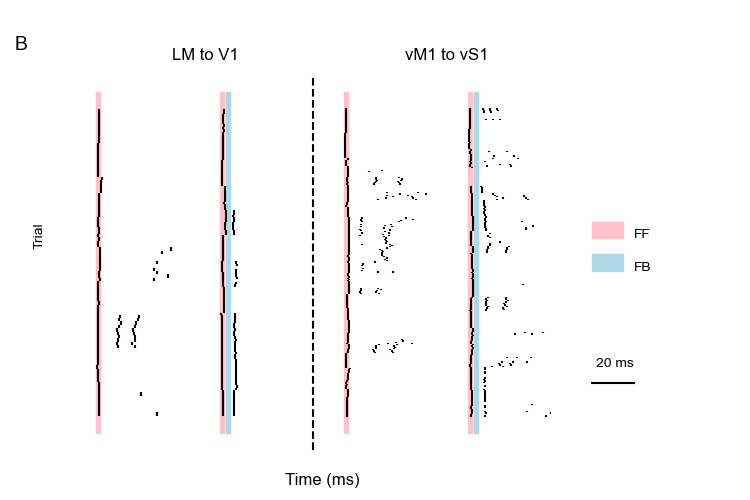

In [4]:
# Raster plot

fig, axs = plt.subplots(1, 5, figsize=(7.5, 5))

x0 = 0

xrange = [x0-10, x0 + 40]
window_size = 1
fsize_label = 14

for iax, ax in enumerate(axs):
    if iax==0:
        protocol = burst.Protocol & 'area="V1"' & 'time_diff is NULL'
    elif iax==1:
        protocol = burst.Protocol & 'area="V1"' & 'time_diff=3'
    elif iax==2:
        protocol = burst.Protocol & 'area="S1"' & 'time_diff is NULL'
    elif iax==3:
        protocol = burst.Protocol & 'area="S1"' & 'time_diff=3'
    
    if iax in [0,1,2,3]:
        cells = burst.Cell & protocol

        fr_mat = []

        spikes_time = (burst.Protocol.Spikes & protocol & cells & 'total_spk_num>0').fetch('spikes_time')
        
        spikes_time = [[j-150 for j in i] for i in spikes_time]
        ax.eventplot(spikes_time, color='black')
        ylim = ax.get_ylim()
        if iax in [1, 3]:
            ax.fill_betweenx(
                ylim, x0+3, x0+5, 
                color='lightblue')
        ax.fill_betweenx(
            ylim, x0, x0+2, color='pink')
        
    else:
        
        x_bar = [x0, x0+20]
        y_bar = 30
        
        ax.plot(x_bar, [y_bar]*2, color='black')
        ax.text(x_bar[0]+2, y_bar+10, '20 ms')
        x_legend = [x0, x0 + 15]
        y_legend_blue = [100, 110]
        y_legend_red = np.add(y_legend_blue, 20)
        
        ax.fill_betweenx(y_legend_blue, x_legend[0], x_legend[1], color='lightblue')
        ax.fill_betweenx(y_legend_red, x_legend[0], x_legend[1], color='pink')
        
        x_diff = 20
        ax.text(x_legend[0] + x_diff, y_legend_blue[0], 'FB')
        ax.text(x_legend[0] + x_diff, y_legend_red[0], 'FF')
        ax.set_ylim(ylim)
    
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_ylabel('Trial')

    if iax == 2:
        ylim = ax.get_ylim()
        line = lines.Line2D([x0-15, x0-15], ylim , linestyle='--', color='black', clip_on=False)
        ax.add_line(line)
    if iax == 0:
        ylim = ax.get_ylim()
        ax.text(-30, round(ylim[1]/2), 'Trial', rotation=90)
    
    ax.set_xlim(xrange)
    ax.set_frame_on(False)

fig.text(0.02, 0.9, 'B', fontsize=fsize_label)
fig.text(0.23, 0.88, r'LM to V1', fontsize=12)
fig.text(0.54, 0.88, r'vM1 to vS1', fontsize=12)
fig.text(0.38, 0.03, 'Time (ms)', fontsize=12)
fig.subplots_adjust(**pos)
fig.subplots_adjust(bottom=0.1)


# Figure 5c - bursting probability

In [5]:
# compute bursting probability
q = dj.U('time_diff', 'area', 'cell_idx').aggr(
    burst.Protocol * burst.Protocol.Spikes, 
    second_spk_prob='AVG(second_spk)', third_spk_prob='AVG(third_spk)')

In [6]:
time_diffs = [-10, -6, -3, 0, 3, 6, 10]

prob_second = []
prob_third = []

for time_diff in time_diffs:
    prob_second.append(np.mean((q & 'area = "V1"' & 'time_diff={}'.format(time_diff)).fetch('second_spk_prob')))
    prob_third.append(np.mean((q & 'area = "V1"' & 'time_diff={}'.format(time_diff)).fetch('third_spk_prob')))

<IPython.core.display.Javascript object>


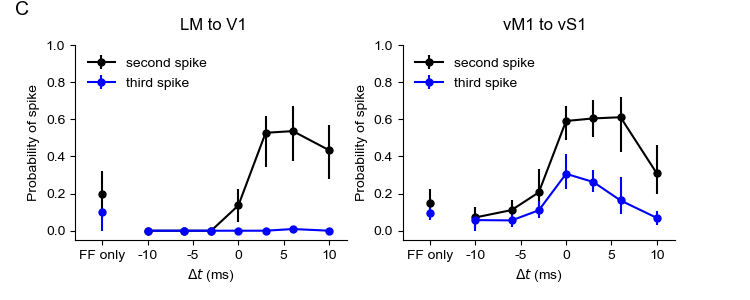

<ipython-input-7-37e497b41d06>:30: InstabilityWarning: BCa acceleration values for indexes (array([0]),) were undefined. Statistic values were likely all equal. Affected CI will be inaccurate.
  ci_second_norm = bootstrap.ci(prob_second_all, np.mean, alpha=0.32) - mean_prob_second
<ipython-input-7-37e497b41d06>:30: InstabilityWarning: Some values were NaN; results are probably unstable (all values were probably equal)
  ci_second_norm = bootstrap.ci(prob_second_all, np.mean, alpha=0.32) - mean_prob_second
<ipython-input-7-37e497b41d06>:32: InstabilityWarning: BCa acceleration values for indexes (array([0]),) were undefined. Statistic values were likely all equal. Affected CI will be inaccurate.
  ci_third_norm = bootstrap.ci(prob_third_all, np.mean, alpha=0.32) - mean_prob_third
<ipython-input-7-37e497b41d06>:32: InstabilityWarning: Some values were NaN; results are probably unstable (all values were probably equal)
  ci_third_norm = bootstrap.ci(prob_third_all, np.mean, alpha=0.32) - 

Mean probability of second spike: [0.0, 0.0, 0.0, 0.13636363636363635, 0.5272727272727272, 0.5363636363636364, 0.43333333333333335]
SEM of probability of second spike: [0.0, 0.0, 0.0, 0.09295224693555366, 0.14607306509279805, 0.1433211312286124, 0.14740554623801777]
Mean probability of third spike: [0.0, 0.0, 0.0, 0.0, 0.0, 0.009090909090909092, 0.0]
SEM probability of third spike: [0.0, 0.0, 0.0, 0.0, 0.0, 0.008667841720414475, 0.0]
Probability of second spike FF: 0.2
SEM of probability of second spike FF: 0.1067707825203131
Probability of third spike FF: 0.1
SEM of probability of third spike FF: 0.09486832980505139
Mean probability of second spike: [0.07142857142857142, 0.1111111111111111, 0.20667, 0.5908583333333334, 0.6046466666666667, 0.6111111111111112, 0.30833750000000004]
SEM of probability of second spike: [0.05235002178930882, 0.05855952641911243, 0.09750200003076859, 0.09076977857495465, 0.09831470958855283, 0.1477773136537778, 0.1297360769715531]
Mean probability of third s

In [7]:
pos = dict(left=0.1, top=0.85, bottom=0.2, right=0.9)
fig, axs = plt.subplots(1, 2, figsize=(7.5, 3))
fsize_label = 14
areas = ['V1', 'S1']
time_diffs = [-10, -6, -3, 0, 3, 6, 10]

for iax, ax in enumerate(axs):
    area = areas[iax]
    
    prob_second = []
    prob_third = []
    ci_second = []
    ci_third = []
    sem_prob_second = []
    sem_prob_third = []

    for time_diff in time_diffs:
        prob_second_all, prob_third_all = \
            (q & 'area="{}"'.format(area) & 'time_diff={}'.format(time_diff)).fetch(
            'second_spk_prob', 'third_spk_prob')
        prob_second_all = prob_second_all.astype('float')
        prob_third_all = prob_third_all.astype('float')
        mean_prob_second = np.mean(prob_second_all)
        sem_prob_second.append(np.divide(np.std(prob_second_all), np.sqrt(len(prob_second_all))))
        mean_prob_third = np.mean(prob_third_all)
        sem_prob_third.append(np.divide(np.std(prob_third_all), np.sqrt(len(prob_third_all))))
        prob_second.append(mean_prob_second)
        prob_third.append(mean_prob_third)
    
        ci_second_norm = bootstrap.ci(prob_second_all, np.mean, alpha=0.32) - mean_prob_second
        ci_second_norm[0] = np.negative(ci_second_norm[0])
        ci_third_norm = bootstrap.ci(prob_third_all, np.mean, alpha=0.32) - mean_prob_third
        ci_third_norm[0] = np.negative(ci_third_norm[0])
        
        ci_second.append(ci_second_norm)
        ci_third.append(ci_third_norm)
        
    ci_second = np.transpose(ci_second)
    ci_third = np.transpose(ci_third)
    prob_second_ff_all, prob_third_ff_all = (q & 'area="{}"'.format(area) & 'time_diff is NULL').fetch(
            'second_spk_prob', 'third_spk_prob')
    prob_second_ff_all = prob_second_ff_all.astype('float')
    prob_third_ff_all = prob_third_ff_all.astype('float')
    
    prob_second_ff = np.mean(prob_second_ff_all)
    prob_third_ff = np.mean(prob_third_ff_all)
    sem_second_ff = np.divide(np.std(prob_second_ff_all), np.sqrt(len(prob_second_ff_all)))
    sem_third_ff = np.divide(np.std(prob_third_ff_all), np.sqrt(len(prob_third_ff_all)))
    ci_second_ff = bootstrap.ci(prob_second_ff_all, np.mean, alpha=0.32) - prob_second_ff
    ci_third_ff = bootstrap.ci(prob_third_ff_all, np.mean, alpha=0.32) - prob_third_ff
    ci_second_ff[0] = np.negative(ci_second_ff[0])
    ci_third_ff[0] = np.negative(ci_third_ff[0])
    
    print('Mean probability of second spike: {}'.format(prob_second))
    print('SEM of probability of second spike: {}'.format(sem_prob_second))
    print('Mean probability of third spike: {}'.format(prob_third))
    print('SEM probability of third spike: {}'.format(sem_prob_third))
    
    print('Probability of second spike FF: {}'.format(prob_second_ff))
    print('SEM of probability of second spike FF: {}'.format(sem_second_ff))
    print('Probability of third spike FF: {}'.format(prob_third_ff))
    print('SEM of probability of third spike FF: {}'.format(sem_third_ff))
    
    if np.isscalar(prob_second_ff):
        ci_second_ff = np.expand_dims(ci_second_ff, axis=1)
    
    if np.isscalar(prob_third_ff):
        ci_third_ff = np.expand_dims(ci_third_ff, axis=1)
    
    ax.errorbar(time_diffs, prob_second, yerr=ci_second, marker='.', markersize=10, color='black', label='second spike')
    ax.errorbar(-15, prob_second_ff, yerr=ci_second_ff, marker='.', markersize=10, color='black')
    
    ax.errorbar(time_diffs, prob_third, yerr=ci_third, marker='.', markersize=10, color='blue', label='third spike')
    ax.errorbar(-15, prob_third_ff, yerr=ci_third_ff, marker='.', markersize=10, color='blue')
    ax.set_ylim([-0.05, 1])
    ax.set_xlim([-18, 12])
    ax.set_xticks([-15, -10, -5, 0, 5, 10])
    ax.set_xticklabels(['FF only', -10, -5, 0, 5, 10])
    ax.set_xlabel('$\Delta t$ (ms)')
    ax.set_ylabel('Probability of spike')
    ax.legend(loc='upper left', frameon=False)
fig.text(0.02, 0.95, 'C', fontsize=fsize_label)
fig.text(0.24, 0.9, r'LM to V1', fontsize=12)
fig.text(0.67, 0.9, r'vM1 to vS1', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(**pos)

# Tests for probabilities of the second and third spikes

In [8]:
# In each feedback pathway, compare the probablities of the second and the third spike between FF only and time_diff = 3

prob_diff_3_second_V1, prob_diff_3_third_V1 = (q & 'area = "V1"' & 'time_diff = 3' & 
    (q & 'area = "V1"' & 'time_diff is null').fetch('cell_idx', as_dict=True)).fetch(
    'second_spk_prob', 'third_spk_prob')
prob_ff_only_second_V1, prob_ff_only_third_V1 = (q & 'area = "V1"' & 'time_diff is null').fetch(
    'second_spk_prob', 'third_spk_prob')
prob_diff_3_second_S1, prob_diff_3_third_S1 = (q & 'area = "S1"' & 'time_diff=3' & 
        (q & 'area = "S1"' & 'time_diff is null').fetch('cell_idx', as_dict=True)).fetch(
    'second_spk_prob', 'third_spk_prob')
prob_ff_only_second_S1, prob_ff_only_third_S1 = (q & 'area = "S1"' & 'time_diff is null').fetch(
    'second_spk_prob', 'third_spk_prob')

In [9]:
testing_results = pd.DataFrame(
    {'Area': ['V1', 'V1', 'S1', 'S1'],
     'Spike number': ['second', 'third', 'second', 'third'],
     'FF only prob mean': [np.mean(prob_ff_only_second_V1), np.mean(prob_ff_only_third_V1),
                           np.mean(prob_ff_only_second_S1), np.mean(prob_ff_only_third_S1)],
     'FF only prob sem': [np.divide(float(np.std(prob_ff_only_second_V1)), np.sqrt(len(prob_ff_only_second_V1))),
                          np.divide(float(np.std(prob_ff_only_third_V1)), np.sqrt(len(prob_ff_only_third_V1))),
                          np.divide(float(np.std(prob_ff_only_second_S1)), np.sqrt(len(prob_ff_only_second_S1))),
                          np.divide(float(np.std(prob_ff_only_third_S1)), np.sqrt(len(prob_ff_only_third_S1)))],
     '3 ms diff prob mean': [np.mean(prob_diff_3_second_V1), np.mean(prob_diff_3_third_V1),
                             np.mean(prob_diff_3_second_S1), np.mean(prob_diff_3_third_S1)],
     '3 ms diff prob sem': [np.divide(float(np.std(prob_diff_3_second_V1)), np.sqrt(len(prob_diff_3_second_V1))),
                            np.divide(float(np.std(prob_diff_3_third_V1)), np.sqrt(len(prob_diff_3_third_V1))),
                            np.divide(float(np.std(prob_diff_3_second_S1)), np.sqrt(len(prob_diff_3_second_S1))),
                            np.divide(float(np.std(prob_diff_3_third_S1)), np.sqrt(len(prob_diff_3_third_S1)))],
     'p value': [scipy.stats.wilcoxon(prob_diff_3_second_V1, prob_ff_only_second_V1)[1],
                 scipy.stats.wilcoxon(prob_diff_3_third_V1, prob_ff_only_third_V1)[1],
                 scipy.stats.wilcoxon(prob_diff_3_second_S1, prob_ff_only_second_S1)[1],
                 scipy.stats.wilcoxon(prob_diff_3_third_S1, prob_ff_only_third_S1)[1]]}
)
testing_results

/Users/shanshen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/shanshen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,Area,Spike number,FF only prob mean,FF only prob sem,3 ms diff prob mean,3 ms diff prob sem,p value
0,V1,second,0.2000,0.106771,0.5800,0.150864,0.045201
1,V1,third,0.1000,0.094868,0.0000,0.000000,0.317311
2,S1,second,0.1491923076923076923076923077,0.065776,0.5438230769230769230769230769,0.103607,0.003346
3,S1,third,0.09467692307692307692307692308,0.041433,0.2384769230769230769230769231,0.060275,0.036658


# Figure 5d-f - second spike in LM to V1 is more time locked to FB stimulus

<IPython.core.display.Javascript object>


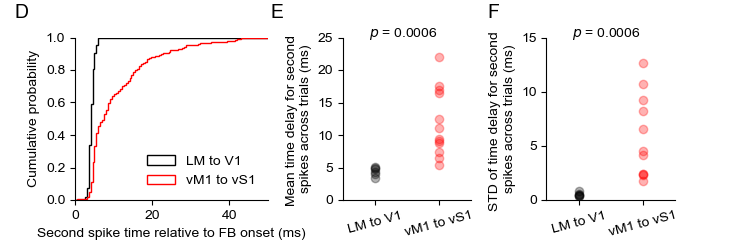

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(7.5, 2.5), gridspec_kw={'width_ratios': [1.5, 1, 1]})

ax1 = axs[0]
areas = ['V1', 'S1']

second_v1 = (
    burst.Protocol * burst.Protocol.Spikes & 'time_diff is not NULL' & 'area="V1"' & 'second_spk=1'
).fetch('second_spk_time')

second_s1 = (
    burst.Protocol * burst.Protocol.Spikes & 'time_diff is not NULL' & 'area="S1"' & 'second_spk=1'
).fetch('second_spk_time')


ax1.hist(second_v1, bins=100, range=(0,50.5),
         cumulative=True, density=True, histtype='step', color='black', label='LM to V1');
ax1.hist(second_s1, bins=100, range=(0,50.5),
         cumulative=True, density=True, histtype='step', color='red', label='vM1 to vS1');

ax1.set_xlim([0, 50])
ax1.set_ylim([0, 1])

ax1.legend(loc='lower right', frameon=False)
ax1.set_xlabel('Second spike time relative to FB onset (ms)')
ax1.set_ylabel('Cumulative probability')

q_delay = dj.U('area', 'cell_idx').aggr(
    burst.Protocol.Spikes * burst.Protocol & 'time_diff is not null' & 'second_spk=1', 
    mean_delay='avg(second_spk_time)', std_delay='std(second_spk_time)')

v1_delay_mean, v1_delay_std = (q_delay & 'area="V1"' & 'mean_delay>0').fetch('mean_delay', 'std_delay')
s1_delay_mean, s1_delay_std = (q_delay & 'area="S1"' & 'mean_delay>0').fetch('mean_delay', 'std_delay')

ax2 = axs[1]
ax2.plot([1]* len(v1_delay_mean), v1_delay_mean, 'o', color='k', alpha=0.3)
ax2.plot([2]* len(s1_delay_mean), s1_delay_mean, 'o', color='r', alpha=0.3)
ax2.set_ylim([0, 25])
ax2.set_xlim([0.5, 2.5])
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['LM to V1', 'vM1 to vS1'], rotation=15)
ax2.set_ylabel('Mean time delay for second \nspikes across trials (ms)')

s, p1 = scipy.stats.ranksums(v1_delay_mean, s1_delay_mean)

ax2.text(0.9, 25, r'$p$ = {}'.format(format(p1, '.1g')))

ax3 = axs[2]
ax3.plot([1]* len(v1_delay_std), v1_delay_std, 'o', color='k', alpha=0.3)
ax3.plot([2]* len(s1_delay_std), s1_delay_std, 'o', color='r', alpha=0.3)
ax3.set_ylim([0, 15])
ax3.set_xlim([0.5, 2.5])
ax3.set_xticks([1, 2])
ax3.set_xticklabels(['LM to V1', 'vM1 to vS1'], rotation=15)
ax3.set_ylabel('STD of time delay for second \nspikes across trials (ms)')

s, p2 = scipy.stats.ranksums(v1_delay_std, s1_delay_std)
ax3.text(0.9, 15, r'$p$ = {}'.format(format(p2, '.1g')))

fig.tight_layout()
fig.subplots_adjust(**pos)
fig.text(0.02, 0.93, 'D', fontsize=fsize_label)
fig.text(0.36, 0.93, 'E', fontsize=fsize_label)
fig.text(0.65, 0.93, 'F', fontsize=fsize_label)

fig.savefig('burst_cum_prob.png', dpi=300)

s, p = scipy.stats.ranksums(second_v1, second_s1)

# Testing for time delay

In [12]:
q_delay = dj.U('area', 'cell_idx').aggr(
    burst.Protocol.Spikes * burst.Protocol & 'time_diff is not null' & 'second_spk=1', 
    mean_delay='avg(second_spk_time)', std_delay='std(second_spk_time)')

In [13]:
v1_delay_mean, v1_delay_std = (q_delay & 'area="V1"' & 'mean_delay>0').fetch('mean_delay', 'std_delay')
s1_delay_mean, s1_delay_std = (q_delay & 'area="S1"' & 'mean_delay>0').fetch('mean_delay', 'std_delay')

In [14]:
testing_results = pd.DataFrame(
    {'Type': ['Delay mean', 'Delay std'],
     'p value': [scipy.stats.ranksums(v1_delay_mean, s1_delay_mean)[1],
                 scipy.stats.ranksums(v1_delay_std, s1_delay_std)[1]]})
testing_results

,Type,p value
0,Delay mean,0.000625
1,Delay std,0.000625
